In [1]:
from har_datasets.supported.getters import get_cfg, get_har_dataset, HAR_DATASET_ID

cfg = get_cfg(dataset_id=HAR_DATASET_ID.UCI_HAR)
dataset = get_har_dataset(dataset_id=HAR_DATASET_ID.UCI_HAR, cfg=cfg)

train_loader, test_loader, val_loader = dataset.get_dataloaders()

1. loading dataframe...
File human+activity+recognition+using+smartphones.zip already exists in ../datasets
Directory ../datasets/human+activity+recognition+using+smartphones already exists and is not empty
2. applying selections...
3. applying normalizations...
4. generating windows...


100%|██████████| 400/400 [00:01<00:00, 339.29it/s]

5. applying per sample normalizations...
6. splitting into train, test and val...
7. done


torch.Size([32, 128, 9])


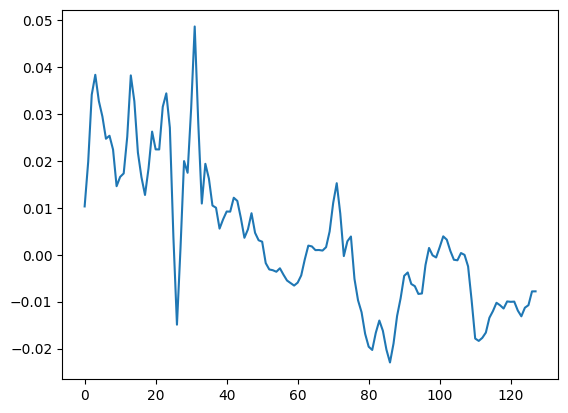

In [11]:
from matplotlib import pyplot as plt

x, y = next(iter(train_loader))
print(x.shape)

plt.plot(x[0, :, 0])
plt.show()